# Teste de Shapiro-Wilk

O teste de Shapiro-Wilk é uma técnica estatística utilizada para verificar se uma amostra de dados segue uma distribuição normal.
Ele avalia a hipótese nula de que os dados foram retirados de uma população com distribuição normal. O teste é baseado na comparação entre os quantis observados e os quantis esperados de uma distribuição normal teórica.


$$H_0 : \text{A~amostra~provem~de~uma~população~com~distribuição~normal}$$

$$H_1 : \text{A~amostra~não~provem~de~uma~população~com~distribuição~normal}$$

A fórmula do Teste de Shapiro-Wilk é:

$W_{calc}=\frac{b^2}{\sum_{i=1}^{n}(X_i-\overline{X})^2}\quad para\quad i=1,...,n$


$b= \sum_{i}^{\frac{n}{2}}a_{i,n}(X_{(n-i-1)}-X_{(i)})$

Sendo:


$\overline{X}$ é a média da amostra.

$X_i$ é a i-ésima observação da amostra.

$X_{(i)}$ são as estatísticas de ordem i da amostra, ou seja, a i-ésima observação ordenada, de modo que $X_{(1)} ≤ X_{(2)} ≤ ⋯ ≤ X_{(n)}$

$a_{i,n}$ são os coeficientes calculados a partir da matriz de covariância dos valores ordenados de uma distribuição normal.

## Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import random
import statistics
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, kurtosis, skew
import statsmodels.api as sm

c:\Users\dorie\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\dorie\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
c:\Users\dorie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Amostragem

*Escolha das amostras*

Foram escolhidas 5 tipos de amostras com 10 amostradas geradas cada

Tipos de amostras:

Amostra aleatória Simples

Distribuição Lognormal

Distribuição Binomial

Distribuição Poisson

Distribuição Normal







In [3]:
# Definir a semente para garantir a reprodutibilidade
seeds = list(range(10))
numeros = list(range(7,19))

size_amostra = 10

# Listas para armazenar as amostras geradas
amostras_aleatorias = [] #amostra aleatória simples
amostras_lognormal = []
amostras_binomial = []
amostras_poisson = []
amostras_normal = []

# Gerar as amostras com seeds diferentes
for seed in seeds:
    random_state = np.random.RandomState(seed)
    amostra_aleatoria = random_state.choice(numeros, size_amostra)  # Amostra aleatória de 10 números
    amostra_lognormal = random_state.lognormal(25, 2, size_amostra)  # Distribuição log-normal com média 0 e desvio padrão 1
    amostra_binomial = random_state.binomial(10, 0.5, size_amostra)  # Distribuição binomial com 10 tentativas e probabilidade de sucesso 0.5
    amostra_poisson = random_state.poisson(2, size_amostra)  # Distribuição de Poisson com lambda = 2
    amostra_normal = random_state.normal(6, 1.5, size_amostra)  # Distribuição normal

    amostras_aleatorias.append(amostra_aleatoria)
    amostras_lognormal.append(amostra_lognormal)
    amostras_binomial.append(amostra_binomial)
    amostras_poisson.append(amostra_poisson)
    amostras_normal.append(amostra_normal)

## Teste de Shapiro - Wilk (Forma Manual)

In [5]:
def transforma_lista_em_dataframe(amostra):
    df = pd.DataFrame(amostra)
    df.columns = ['X_(i)']
    df = df.sort_values(by='X_(i)').reset_index(drop=True)
    return df

In [6]:
# Coeficientes a_in para n = 10

coeficient_table = pd.read_csv('Shapiro-Wilk-Tables.csv')
coeficient_table

size_amostra_str = str(size_amostra)
a_in =  coeficient_table[size_amostra_str][:5]

In [7]:
def medidas_estatisticas(df):
    media = df['X_(i)'].mean()
    mediana = df['X_(i)'].median()
    moda = df['X_(i)'].mode().values[0]
    variancia = df['X_(i)'].var()
    desvio_padrao = df['X_(i)'].std()
    erro_padrao_media = desvio_padrao / np.sqrt(size_amostra)
    curtose= kurtosis(df['X_(i)'])
    intervalo = df['X_(i)'].max() - df['X_(i)'].min()
    assimetria = skew(df['X_(i)'])
    return media, mediana, moda, variancia, desvio_padrao, erro_padrao_media, curtose, intervalo, assimetria

In [8]:
# Calculando b
def calcular_b(size_amostra,amostra,df):
    n = size_amostra
    n_sobre_2 = int(n/2)
    b = 0

    for i in range(n_sobre_2):
        dif = (df['X_(i)'][n-i-1]-df['X_(i)'][i])
        b += a_in[i]*dif
    return b

#wcalc
def Wcalc(b,amostra, df,media):
    numerador = np.power(b,2)

    denominador = sum([(amostra[i] - media)**2 for i in range(len(df))])

    Wcalc = numerador/denominador

    return Wcalc


def verify_hipotese(Wc,Wcalc):
    if Wcalc > Wc:
        return True #Aceita-se a hipótese nula
    else:
        return False #Rejeita-se a hipótese nula


In [9]:
def verify_hipotese(Wcalc,Wc):
    if Wcalc > Wc:
        return True #Aceita-se a hipótese nula
    else:
        return False #Rejeita-se a hipótese nula
    

In [10]:
def sw_manual(amostra,Wc):
    df_amostra = transforma_lista_em_dataframe(amostra)
    estatisticas = medidas_estatisticas(df_amostra)
    mean = estatisticas[0]
    b = calcular_b(size_amostra,amostra,df_amostra)
    Wcalc_result = Wcalc(b,amostra,df_amostra, mean)
    verify_hipotese_result = verify_hipotese(Wcalc_result,Wc)


    return {
            'media': estatisticas[0],
            'mediana': estatisticas[1],
            'moda': estatisticas[2],
            'variancia': estatisticas[3],
            'desvio_padrao': estatisticas[4],
            'erro_padrao': estatisticas[5],
            'curtose': estatisticas[6],
            'intervalo': estatisticas[7],
            'assimetria': estatisticas[8]
        }, Wcalc_result, verify_hipotese_result

    

## Chamando a função manual e armazenando na tabela

In [11]:
lista_amostras = [amostras_aleatorias, amostras_lognormal, amostras_binomial, amostras_poisson, amostras_normal]
tipos = ['Simples', 'Lognormal', 'Binomial', 'Poisson', 'Normal']
#lista_nomes_amostras = [f'{tipos[i]}_{j}' for i in range(5) for j in range(1, 11)]
#lista_nomes_amostras

In [12]:
df_dados_amostras = pd.DataFrame(columns=[
'Amostra',
'Media',
'Mediana',
'Moda',
'Variância',
'Desvio Padrão',
'Erro Padrão',
'Curtose',
'Intervalo',
'Assimetria',
'Wcalc',
'isNormal'])

In [13]:
contador_tipos = {tipo: 1 for tipo in tipos}

for i, tipo_amostra in enumerate(tipos):
    amostras_do_tipo = lista_amostras[i]  # Lista de amostras correspondente ao tipo

    for j, amostra in enumerate(amostras_do_tipo, start=1):
        nome_amostra = f'{tipo_amostra}_{j}'  # Nome da amostra com índice específico

        Wc = 0.781
        estatisticas, Wcalc_result, verify_hipotese_result = sw_manual(amostra, Wc)

        # Inputar os valores no DataFrame
        df_dados_amostras.loc[len(df_dados_amostras)] = [
            nome_amostra,
            estatisticas['media'],
            estatisticas['mediana'],
            estatisticas['moda'],
            estatisticas['variancia'],
            estatisticas['desvio_padrao'],
            estatisticas['erro_padrao'],
            estatisticas['curtose'],
            estatisticas['intervalo'],
            estatisticas['assimetria'],
            Wcalc_result,
            verify_hipotese_result
        ]


In [14]:
df_dados_amostras

,Amostra,Media,Mediana,Moda,Variância,Desvio Padrão,Erro Padrão,Curtose,Intervalo,Assimetria,Wcalc,isNormal
0,Simples_1,1.180000e+01,1.100000e+01,1.000000e+01,1.128889e+01,3.359894e+00,1.062492e+00,-0.640089,1.100000e+01,0.534326,0.944813,True
1,Simples_2,1.270000e+01,1.300000e+01,7.000000e+00,1.801111e+01,4.243950e+00,1.342055e+00,-1.353208,1.100000e+01,-0.194349,0.902133,True
2,Simples_3,1.340000e+01,1.450000e+01,1.500000e+01,1.315556e+01,3.627059e+00,1.146977e+00,-1.205784,1.000000e+01,-0.296314,0.890853,True
3,Simples_4,1.340000e+01,1.500000e+01,1.500000e+01,1.182222e+01,3.438346e+00,1.087300e+00,-0.924105,1.000000e+01,-0.634807,0.883302,True
4,Simples_5,1.370000e+01,1.450000e+01,1.400000e+01,9.788889e+00,3.128720e+00,9.893881e-01,-0.651496,9.000000e+00,-0.785636,0.882320,True
5,Simples_6,1.240000e+01,1.300000e+01,7.000000e+00,1.337778e+01,3.657564e+00,1.156623e+00,-0.970806,1.100000e+01,-0.208535,0.953137,True
6,Simples_7,1.370000e+01,1.600000e+01,1.700000e+01,1.778889e+01,4.217688e+00,1.333750e+00,-1.414133,1.100000e+01,-0.537996,0.827182,True
7,Simples_8,1.330000e+01,1.400000e+01,1.400000e+01,5.122222e+00,2.263233e+00,7.156970e-01,-1.209415,6.000000e+00,-0.391591,0.887615,True
8,Simples_9,1.210000e+01,1.150000e+01,1.000000e+01,1.210000e+01,3.478505e+00,1.100000e+00,-1.356773,1.000000e+01,0.012021,0.935655,True
9,Simples_10,1.360000e+01,1.300000e+01,1.300000e+01,9.377778e+00,3.062316e+00,9.683893e-01,-0.482379,1.000000e+01,-0.090050,0.944802,True


In [15]:
df_dados_amostras['isNormal'].value_counts()


isNormal
True     40
False    10
Name: count, dtype: int64

## Utilizando a função shapiro do módulo Stats da biblioteca Scipy

In [16]:
def funcao_shapiro_scipy(Wc,amostra):
    Wcalc,pvalue = stats.shapiro(amostra)

    verify_hipotese_result = verify_hipotese(Wcalc,Wc)

    return Wcalc,pvalue, verify_hipotese_result

In [17]:
df_comparativo = pd.DataFrame(columns=[
'Amostra',
'Wcalc_Manual',
'Wcalc_Scipy',
'Pvalue',
'Diferença',
'isNormal_Manual',
'isNormal_Scipy'])

In [18]:
contador_tipos = {tipo: 1 for tipo in tipos}

for i, tipo_amostra in enumerate(tipos):
    amostras_do_tipo = lista_amostras[i]  # Lista de amostras correspondente ao tipo

    for j, amostra in enumerate(amostras_do_tipo, start=1):
        nome_amostra = f'{tipo_amostra}_{j}'  # Nome da amostra com índice específico

        Wc = 0.781
        Wcalc_result, verify_hipotese_result = sw_manual(amostra, Wc)[1:3]
        Wcalc_scipy, pvalue, verify_hipotese_scipy = funcao_shapiro_scipy(Wc,amostra)

        # Inputar os valores no DataFrame
        df_comparativo.loc[len(df_comparativo)] = [
            nome_amostra,
            Wcalc_result,
            Wcalc_scipy,
            pvalue,
            abs(Wcalc_result-Wcalc_scipy),
            verify_hipotese_result,
            verify_hipotese_scipy
        ]


In [19]:
df_comparativo

,Amostra,Wcalc_Manual,Wcalc_Scipy,Pvalue,Diferença,isNormal_Manual,isNormal_Scipy
0,Simples_1,0.944813,0.944660,6.059241e-01,0.000153,True,True
1,Simples_2,0.902133,0.902144,2.312619e-01,0.000011,True,True
2,Simples_3,0.890853,0.890756,1.729319e-01,0.000097,True,True
3,Simples_4,0.883302,0.883285,1.422985e-01,0.000017,True,True
4,Simples_5,0.882320,0.882094,1.379093e-01,0.000226,True,True
5,Simples_6,0.953137,0.952996,7.040006e-01,0.000141,True,True
6,Simples_7,0.827182,0.827308,3.105201e-02,0.000126,True,True
7,Simples_8,0.887615,0.887475,1.587995e-01,0.000140,True,True
8,Simples_9,0.935655,0.935747,5.067300e-01,0.000092,True,True
9,Simples_10,0.944802,0.944541,6.045561e-01,0.000261,True,True


In [21]:
# Verificação da conclusão das hipóteses
igualdade = df_comparativo['isNormal_Manual'].equals(df_comparativo['isNormal_Scipy'])
igualdade

True

In [22]:
# Média das diferenças
media_diferencas = df_comparativo['Diferença'].mean()
media_diferencas

0.0001704765860013957

## Plotagem homogênea das amostras

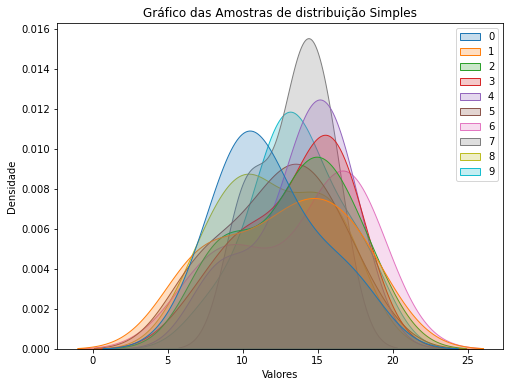

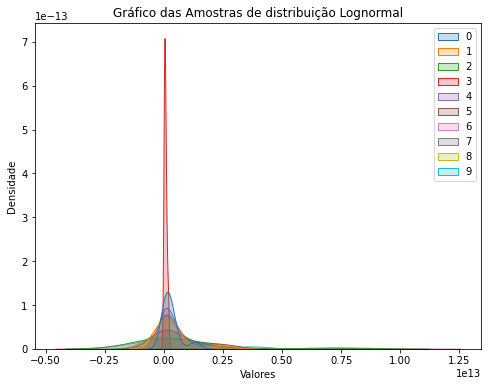

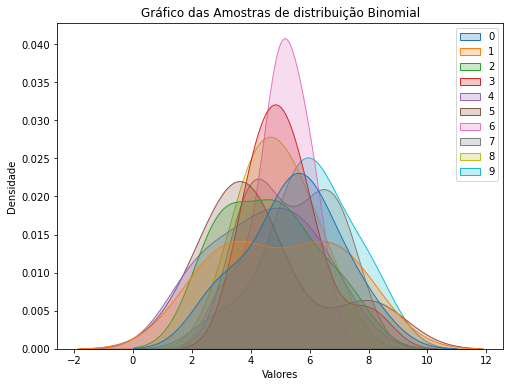

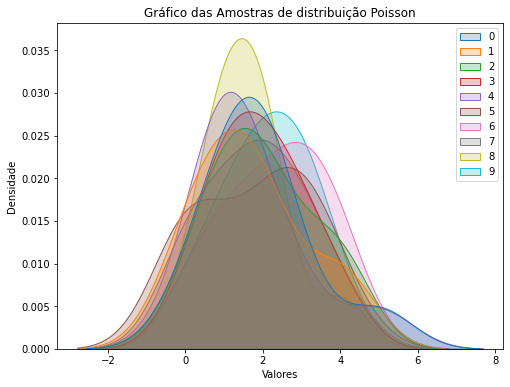

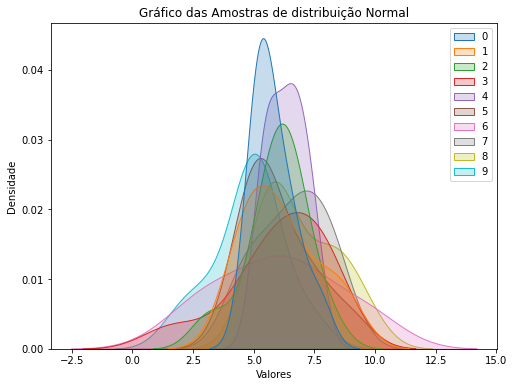

In [219]:
for i in range(5):

    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=lista_amostras[i], fill=True)
    if i == 0:
        plt.title('Gráfico das Amostras Aleatórias ' + tipos[i])
    plt.title('Gráfico das Amostras de distribuição ' + tipos[i])
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.show()